# Neural Network classification of Breast Cancer using Pandas and Keras

Import the appropriate packages and load the dataset

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
data = load_breast_cancer(as_frame=True)
df = data.frame


In [ ]:
# Calculate metrics
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print(f"Class distribution:\n{df['target'].value_counts(normalize=True)}")
#show the number of missing values in each column of a pandas DataFrame df.
print(f"Missing values:\n{df.isna().sum()}")

Number of rows: 569
Number of columns: 31
Class distribution:
1    0.627417
0    0.372583
Name: target, dtype: float64
Missing values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension 

In the following it shows a graphical representation of the distribution of the values in each column of a pandas DataFrame. Specifically, it creates a box-and-whisker plot for each column of the DataFrame, where the box represents the interquartile range (IQR) of the distribution, the horizontal line inside the box represents the median of the distribution, and the whiskers represent the range of the distribution outside the IQR.

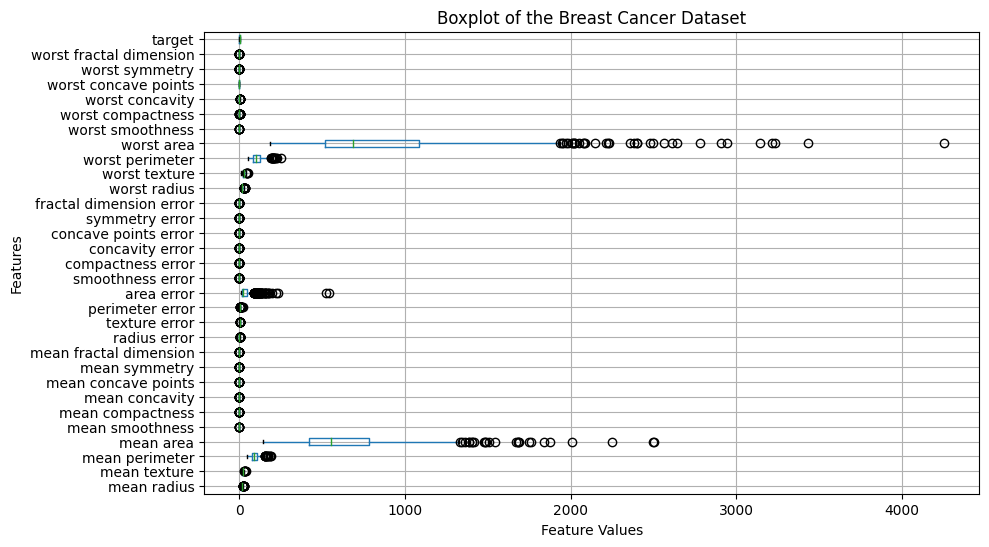

In [ ]:
import matplotlib.pyplot as plt
# Visualize the dataset
fig, ax = plt.subplots(figsize=(10,6))
df.boxplot(ax=ax, vert=False)
ax.set_title('Boxplot of the Breast Cancer Dataset')
ax.set_xlabel('Feature Values')
ax.set_ylabel('Features')
plt.show()

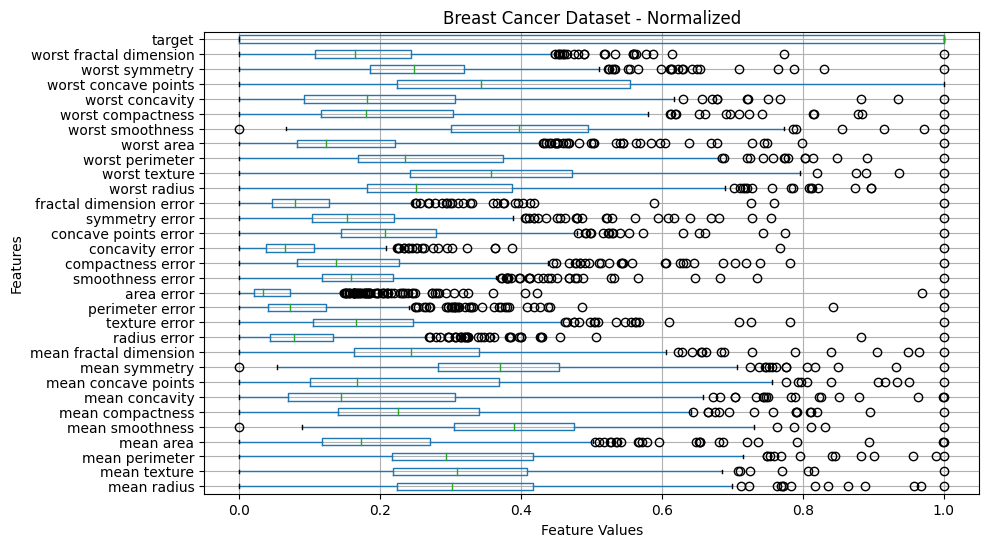

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Visualize the normalized dataset using a horizontal box plot
fig, ax = plt.subplots(figsize=(10,6))
df.boxplot(ax=ax, vert=False)

# Set the plot title and labels
ax.set_title('Breast Cancer Dataset - Normalized')
ax.set_xlabel('Feature Values')
ax.set_ylabel('Features')

plt.show()

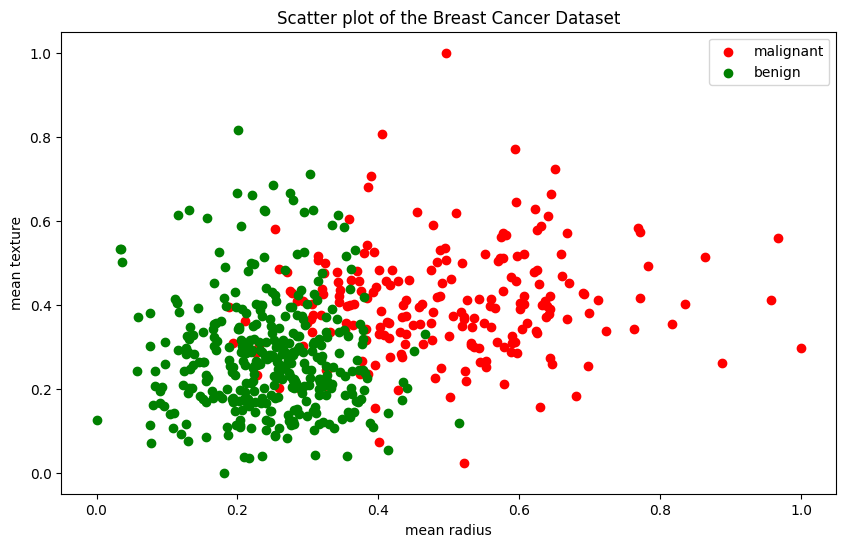

In [ ]:
#for visualizing the load_breast_cancer dataset, I used the first two features of the dataset for the scatter plot. These features are mean radius and mean texture.
#Specifically, the code df.iloc[:, 0] and df.iloc[:, 1] are used to select the first and second columns of the DataFrame
fig, ax = plt.subplots(figsize=(10,6))
colors = ['r', 'g']
for i in range(len(data.target_names)):
    ax.scatter(df.iloc[:, 0][df.target==i], df.iloc[:, 1][df.target==i], c=colors[i], label=data.target_names[i])
ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])
ax.set_title('Scatter plot of the Breast Cancer Dataset')
ax.legend()
plt.show()

So, this model has two layers: one hidden layer with 10 neurons and ReLU activation, and one output layer with a single neuron and sigmoid activation. The input layer is implicitly defined by the input_dim parameter of the first hidden layer. The weights of the model are initialized randomly, and will be adjusted during training to minimize the loss function. The input_dim parameter specifies the number of input features (or columns) in the dataset, and is equal to the number of neurons in the input layer

In [ ]:
from keras.utils.vis_utils import plot_model

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2)


# Create a neural network model
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))


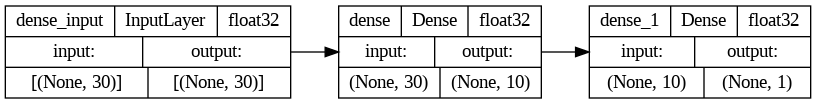

In [ ]:
# Visualize the model
plot_model(model, show_shapes=True, show_layer_names=True, rankdir='LR', expand_nested=True, show_dtype=True)


This sets the loss function to binary cross-entropy, which is commonly used for binary classification problems. 
The binary cross-entropy measures the difference between the predicted and true class probabilities, and is minimized during training.

'epochs': This specifies the number of epochs (iterations) to train the model for. One epoch is one pass through the entire training dataset.

'batch_size': This specifies the number of samples that will be propagated through the network at once before the weights are updated. This can affect the convergence of the model during training.

Epoch 1/100
15/15 [==============================] - 3s 58ms/step - loss: 0.7068 - accuracy: 0.4967 - val_loss: 0.6956 - val_accuracy: 0.5175
Epoch 2/100
15/15 [==============================] - 0s 14ms/step - loss: 0.6969 - accuracy: 0.5451 - val_loss: 0.6865 - val_accuracy: 0.5702
Epoch 3/100
15/15 [==============================] - 0s 10ms/step - loss: 0.6876 - accuracy: 0.5934 - val_loss: 0.6781 - val_accuracy: 0.7018
Epoch 4/100
15/15 [==============================] - 0s 10ms/step - loss: 0.6786 - accuracy: 0.6923 - val_loss: 0.6696 - val_accuracy: 0.7719
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 0.6696 - accuracy: 0.7648 - val_loss: 0.6597 - val_accuracy: 0.7807
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 0.6604 - accuracy: 0.8066 - val_loss: 0.6493 - val_accuracy: 0.8246
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.6499 - accuracy: 0.8286 - val_loss: 0.6364 - val_accuracy: 0.8246
Epoch 8/1

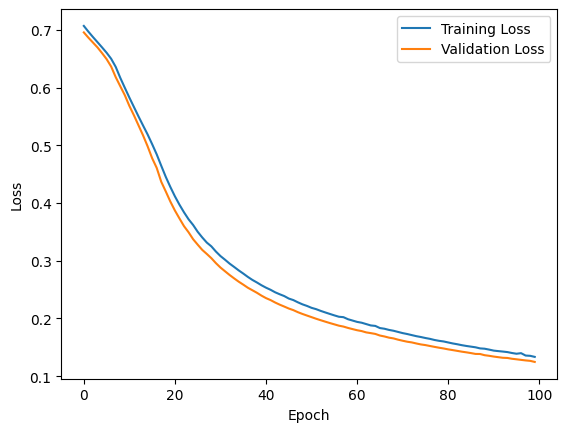

In [ ]:
from keras.callbacks import EarlyStopping
# Compile the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
scores = model.evaluate(X_test, y_test)
print()
print(f'Accuracy: {scores[1]*100:.2f}%')

# Get the predictions of the model on the test set
y_pred = model.predict(X_test)

# Calculate other interesting metrics
from sklearn.metrics import classification_report
print()
print(classification_report(y_test, y_pred.round()))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



Epoch 1/100
15/15 [==============================] - 2s 39ms/step - loss: 0.1327 - accuracy: 0.9648 - val_loss: 0.1228 - val_accuracy: 0.9737
Epoch 2/100
15/15 [==============================] - 0s 12ms/step - loss: 0.1308 - accuracy: 0.9670 - val_loss: 0.1215 - val_accuracy: 0.9737
Epoch 3/100
15/15 [==============================] - 0s 13ms/step - loss: 0.1292 - accuracy: 0.9670 - val_loss: 0.1206 - val_accuracy: 0.9737
Epoch 4/100
15/15 [==============================] - 0s 9ms/step - loss: 0.1280 - accuracy: 0.9670 - val_loss: 0.1196 - val_accuracy: 0.9737
Epoch 5/100
15/15 [==============================] - 0s 9ms/step - loss: 0.1270 - accuracy: 0.9670 - val_loss: 0.1187 - val_accuracy: 0.9737
Epoch 6/100
15/15 [==============================] - 0s 12ms/step - loss: 0.1260 - accuracy: 0.9670 - val_loss: 0.1177 - val_accuracy: 0.9737
Epoch 7/100
15/15 [==============================] - 0s 19ms/step - loss: 0.1247 - accuracy: 0.9692 - val_loss: 0.1167 - val_accuracy: 0.9737
Epoch 8/

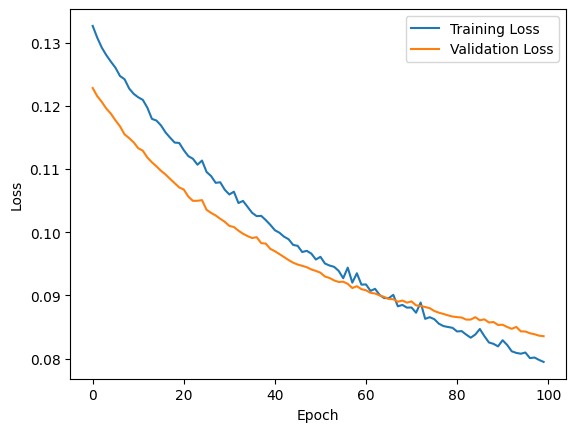

In [ ]:
from tensorflow.keras import layers
from keras import regularizers

# Create a neural network model 
model_2 = Sequential([
    layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
scores = model.evaluate(X_test, y_test)
print()
print(f'Accuracy: {scores[1]*100:.2f}%')

# Get the predictions of the model on the test set
y_pred = model.predict(X_test)

# Calculate other interesting metrics
from sklearn.metrics import classification_report
print()
print(classification_report(y_test, y_pred.round()))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
